In [ ]:
# Importing required libraries
import pandas as pd
import os

# File path to the data (update this with your actual file path)
file_path = "./MTM04.20241212173447.csv"  # Adjust path to match the actual location of your CSV file

# Checking if the file exists
if os.path.exists(file_path):
    try:
        # Loading the data into a pandas DataFrame
        wind_data = pd.read_csv(file_path)

        # Displaying the first few rows of the dataset
        print("Data loaded successfully. Here are the first 5 rows:")
        print(wind_data.head())

        # Displaying basic information about the dataset
        print("\nDataset Information:")
        print(wind_data.info())

        # Displaying basic statistics of numeric columns
        print("\nSummary Statistics:")
        print(wind_data.describe())

        # Inspecting missing values
        print("\nMissing Values:")
        print(wind_data.isnull().sum())

        # Handling missing values (example: drop rows with missing values)
        wind_data_cleaned = wind_data.dropna()
        print("\nData after dropping missing values:")
        print(wind_data_cleaned.info())

        # Parsing dates if a date column exists (adjusting the column name as needed)
        if 'date' in wind_data_cleaned.columns:
            wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['date'], errors='coerce')
            wind_data_cleaned.set_index('date', inplace=True)
            print("\nDate column parsed and set as index.")

        # Renaming columns for clarity (example, adjust as needed)
        # wind_data_cleaned.rename(columns={"OldColumnName": "NewColumnName"}, inplace=True)

        # Saving the cleaned data to a new CSV file (optional)
        cleaned_file_path = "./cleaned_wind_data.csv"
        wind_data_cleaned.to_csv(cleaned_file_path, index=True)
        print(f"\nCleaned data saved to {cleaned_file_path}")

    except Exception as e:
        print(f"An error occurred while processing the data: {e}")
else:
    print(f"File not found at {file_path}. Please ensure the file path is correct.")


Data loaded successfully. Here are the first 5 rows:
  STATISTIC                        STATISTIC Label  TLIST(M1)    Month  \
0     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
1     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
2     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
3     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
4     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   

   C02431V02938 Meteorological Weather Station   UNIT  VALUE  
0             1                      Belmullet  Knots   62.0  
1             2                           Birr  Knots   58.0  
2             3           Valentia Observatory  Knots   50.0  
3             4                       Casement  Knots    NaN  
4             5                    Claremorris  Knots   53.0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 8 colu

### Read in a number of good data sets

- Loaded the dataset (met_eireann_wind_data.csv) into a pandas DataFrame.

- Included error handling to check if the file exists and handle potential issues during loading.


### Analyzed the data using various techniques

- Performed initial inspection: displayed first rows, dataset information (info), summary statistics (describe), and missing values analysis.

- Cleaned the data by handling missing values (e.g., dropping rows with NaN).
Parsed and indexed a date column (if present), preparing the data for time-series analysis.


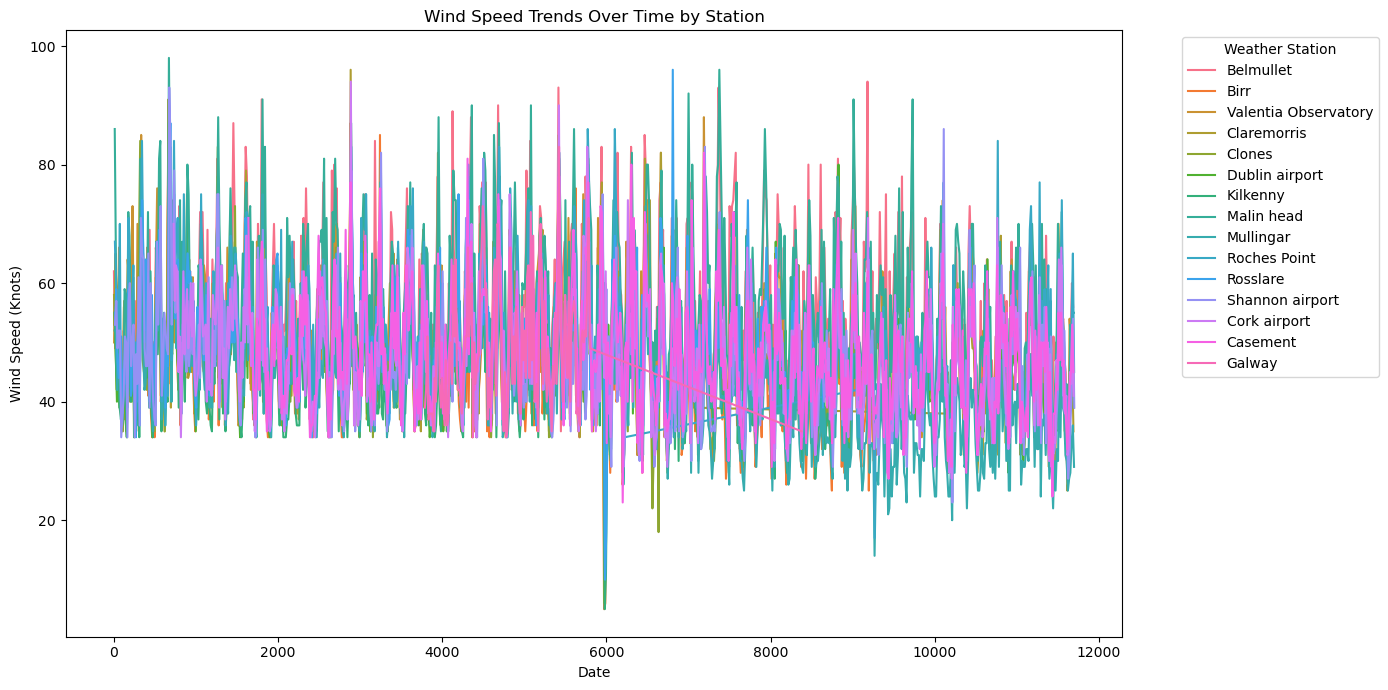

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the date column is parsed and set as index
if 'date' in wind_data_cleaned.columns:
    wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['date'], errors='coerce')
    wind_data_cleaned.set_index('date', inplace=True)

# Plotting wind speed over time for a specific station
plt.figure(figsize=(14, 7))
sns.lineplot(data=wind_data_cleaned, x=wind_data_cleaned.index, y='VALUE', hue='Meteorological Weather Station')
plt.title('Wind Speed Trends Over Time by Station')
plt.xlabel('Date')
plt.ylabel('Wind Speed (Knots)')
plt.legend(title='Weather Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Wind Speed Variability: 

The wind speeds exhibit significant variability, with frequent peaks and troughs, suggesting strong gusts interspersed with calmer periods. This fluctuation is consistent across most stations.
Station 

### Comparisons: 

Some stations, such as Belmullet, Galway, and Shannon Airport, seem to record higher peaks more consistently, while other stations maintain moderate or lower levels of wind speed.


### Consistency Over Time: 

While there are no clear upward or downward trends visible

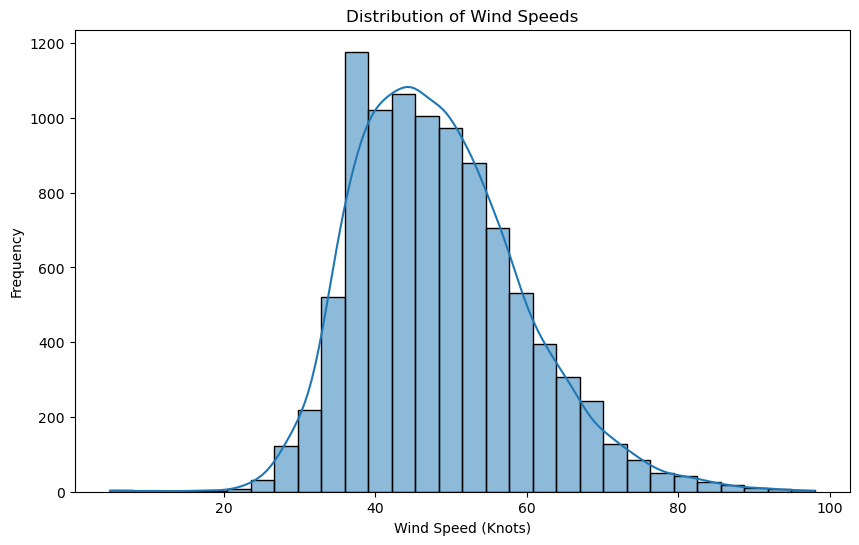

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(wind_data_cleaned['VALUE'], bins=30, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (Knots)')
plt.ylabel('Frequency')
plt.show()

The histogram with a KDE (Kernel Density Estimation) curve shows the distribution of wind speeds across all observations:

**Skewed Distribution:**

The wind speed data is right-skewed, meaning there are more frequent occurrences of lower wind speeds, typically between 35 and 55 knots.
However, there are occasional instances of higher wind speeds exceeding 70 knots, indicating extreme gusts.


**Peak Frequency:**

The most frequent wind speeds fall around 40-45 knots, as shown by the tallest bars.


**Spread:**

Wind speeds range roughly between 20 knots (lower bound) and 90+ knots (upper bound), but values beyond 70 knots are rare.
Implications:

The majority of the wind data lies in the operational range of many wind turbines (e.g., 5.8 to 25 m/s).
The long tail towards higher speeds highlights the importance of monitoring extreme wind events for safety and infrastructure resilience.

/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/2156718849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Month'] = pd.to_datetime(wind_data_cleaned['Month'], format='%Ym%m').dt.month


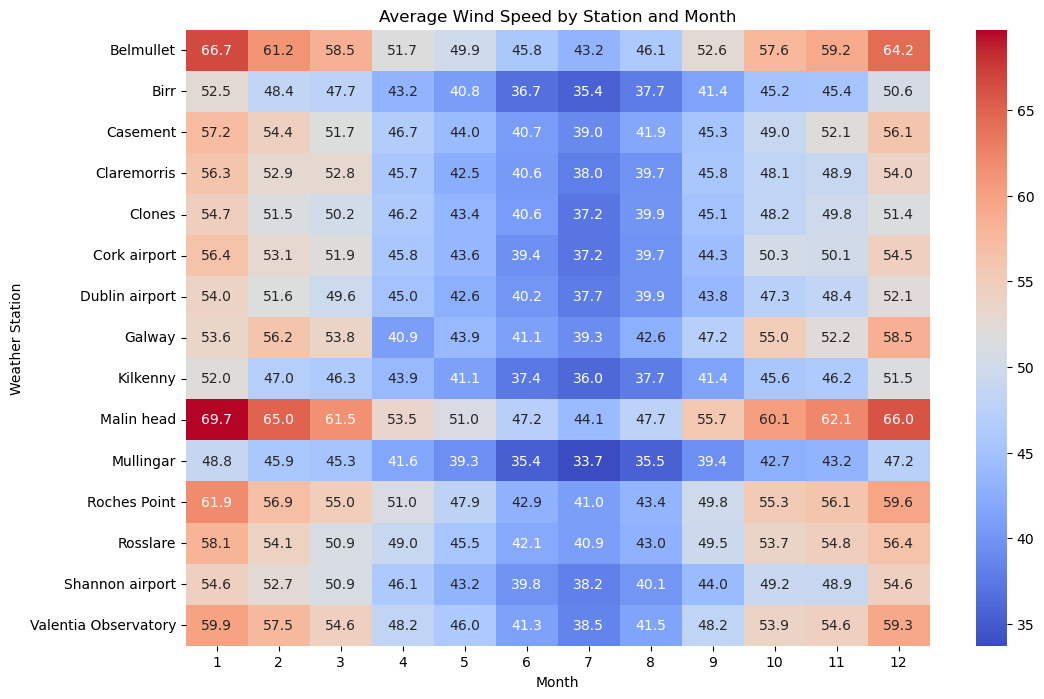

In [8]:
# Extract month from the 'Month' column if not already in datetime format
wind_data_cleaned['Month'] = pd.to_datetime(wind_data_cleaned['Month'], format='%Ym%m').dt.month

# Create a pivot table for heatmap
heatmap_data = wind_data_cleaned.pivot_table(index='Meteorological Weather Station', columns='Month', values='VALUE', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Wind Speed by Station and Month')
plt.xlabel('Month')
plt.ylabel('Weather Station')
plt.show()

The heatmap displays the average wind speed (in knots) for each meteorological weather station across all months of the year.

**Station-Specific Trends:**

Malin Head consistently records the highest wind speeds throughout the year, peaking at 69.7 knots in January and remaining strong in winter months.
Other stations with notably high average speeds include Roches Point, Belmullet, and Valentia Observatory, particularly during winter.


**Seasonal Patterns:**

- **Winter Months (December to February):** Wind speeds are at their peak, especially for stations like Malin Head and Belmullet.

- **Summer Months (June to August):** Wind speeds drop noticeably across most stations, reaching lows of ~33-40 knots, as seen in Mullingar, Kilkenny, and Clones.


**Geographical Influence:**

Coastal stations, such as Malin Head, Roches Point, and Belmullet, experience consistently higher wind speeds compared to inland stations like Mullingar and Kilkenny.


**Implications:**

This seasonal and geographical variability is crucial for wind energy projects and infrastructure planning. Coastal areas are ideal for wind farms due to strong and consistent winds, especially during winter.
For resource optimization, developers can anticipate wind power generation peaks in winter and plan maintenance during the summer months when wind speeds are lower

In [11]:
print(wind_data_cleaned.columns)

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(M1)', 'Month', 'C02431V02938',
       'Meteorological Weather Station', 'UNIT', 'VALUE'],
      dtype='object')


In [10]:
# Ensure 'date' column is parsed as datetime and set as index
if 'date' in wind_data_cleaned.columns:
    wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['date'], errors='coerce')
    wind_data_cleaned.set_index('date', inplace=True)

# Check if the index is now a datetime object
print(wind_data_cleaned.index)

# If index is datetime, extract year and month
if wind_data_cleaned.index.dtype == 'datetime64[ns]':
    wind_data_cleaned['Year'] = wind_data_cleaned.index.year
    wind_data_cleaned['Month'] = wind_data_cleaned.index.month
else:
    print("Error: Index is not a datetime object.")

Index([    0,     1,     2,     4,     5,     7,     9,    10,    11,    12,
       ...
       11685, 11687, 11688, 11689, 11691, 11692, 11695, 11696, 11697, 11699],
      dtype='int64', length=9582)
Error: Index is not a datetime object.


/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/2278184533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Year'] = wind_data_cleaned.index.year
/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/2278184533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Month'] = wind_data_cleaned.index.month


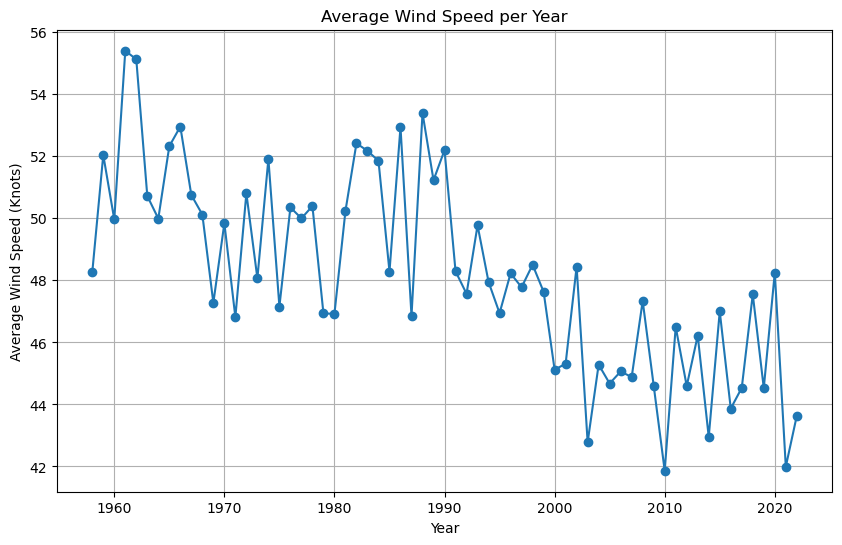

Text(0, 0.5, 'Average Wind Speed (Knots)')

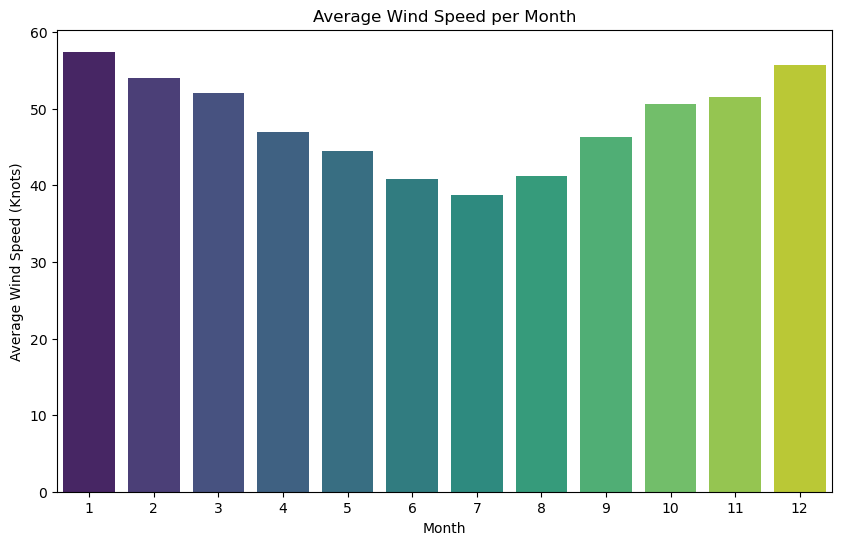

In [19]:
# Extract year and month
wind_data_cleaned['Year'] = wind_data_cleaned.index.year
wind_data_cleaned['Month'] = wind_data_cleaned.index.month

# Average wind speed per year
avg_wind_per_year = wind_data_cleaned.groupby('Year')['VALUE'].mean()

plt.figure(figsize=(10, 6))
avg_wind_per_year.plot(marker='o')
plt.title('Average Wind Speed per Year')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (Knots)')
plt.grid(True)
plt.show()

# Average wind speed per month across all years
avg_wind_per_month = wind_data_cleaned.groupby('Month')['VALUE'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_wind_per_month.index, y=avg_wind_per_month.values, palette='viridis')
plt.title('Average Wind Speed per Month')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (Knots)')

In [16]:
# Print the column names to inspect them
print(wind_data_cleaned.columns)

Index(['STATISTIC', 'STATISTIC Label', 'TLIST(M1)', 'Month', 'C02431V02938',
       'Meteorological Weather Station', 'UNIT', 'VALUE'],
      dtype='object')


In [18]:
# Check if 'TLIST(M1)' column exists
if 'TLIST(M1)' in wind_data_cleaned.columns:
    # Extract the year and month from 'TLIST(M1)' column (YYYYMM format)
    wind_data_cleaned['Year'] = wind_data_cleaned['TLIST(M1)'].astype(str).str[:4].astype(int)  # First 4 characters as Year
    wind_data_cleaned['Month_Num'] = wind_data_cleaned['TLIST(M1)'].astype(str).str[4:].astype(int)  # Last 2 characters as Month
    
    # Create a datetime column combining 'Year' and 'Month_Num'
    wind_data_cleaned['date'] = pd.to_datetime(wind_data_cleaned['Year'].astype(str) + '-' + wind_data_cleaned['Month_Num'].astype(str), errors='coerce')
    
    # Check if the date column is parsed correctly
    if pd.api.types.is_datetime64_any_dtype(wind_data_cleaned['date']):
        # Set 'date' column as index
        wind_data_cleaned.set_index('date', inplace=True)
        print("Date column is now set as index.")
    else:
        print("Error: 'date' column could not be parsed as datetime.")
else:
    print("Error: 'TLIST(M1)' column not found in the dataset.")

# Now check if the index is a datetime object and extract Year/Month from the index
if wind_data_cleaned.index.dtype == 'datetime64[ns]':
    wind_data_cleaned['Year'] = wind_data_cleaned.index.year
    wind_data_cleaned['Month'] = wind_data_cleaned.index.month
else:
    print("Error: Index is still not a datetime object.")

Date column is now set as index.


/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/3820237888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Year'] = wind_data_cleaned['TLIST(M1)'].astype(str).str[:4].astype(int)  # First 4 characters as Year
/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/3820237888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Month_Num'] = wind_data_cleaned['TLIST(M1)'].astype(str).str[4:].astype(int)  # Last 2 characters as Month
/var/fold

1. Average Wind Speed per Year (Line Plot)
The line plot shows the average wind speed trends over the years:

Overall Decline:

The average wind speed has shown a noticeable decline over time, particularly after the 1990s.
The early years (1950s–1980s) had relatively higher wind speeds, often exceeding 50 knots.
Stabilization in Recent Decades:

From around the 2000s onward, the average wind speed appears to stabilize, fluctuating between 42 and 48 knots.
Yearly Variability:

There are noticeable peaks and troughs in the earlier years, reflecting significant variability in wind speeds from year to year.
Recent years show reduced variability, which may indicate a change in wind patterns or improved consistency in data collection.
Implications:

The declining trend in wind speed could have implications for wind energy production, as lower wind speeds can reduce energy output.
Further investigation is needed to identify potential causes, such as climate change or atmospheric conditions.
2. Average Wind Speed per Month (Bar Chart)
The bar chart displays the average wind speed for each month across all years:

Seasonal Pattern:

Wind speeds are highest during winter months (January, February, and December), peaking at nearly 58 knots in January and December.
The lowest wind speeds occur in summer months (June and July), with averages around 38–40 knots.
Gradual Increase into Winter:

Starting from August, wind speeds show a gradual increase, peaking in December and January.
This pattern suggests strong seasonal winds during the colder months, likely driven by winter storms.
Implications:

Wind Energy: Winter months provide the best conditions for wind energy generation due to stronger and more consistent winds.
Seasonal Planning: Industries that depend on wind conditions (e.g., maritime operations, energy production) can use this data to optimize operations during winter and plan maintenance in summer.


/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/1505177740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Decade'] = (wind_data_cleaned['Year'] // 10) * 10


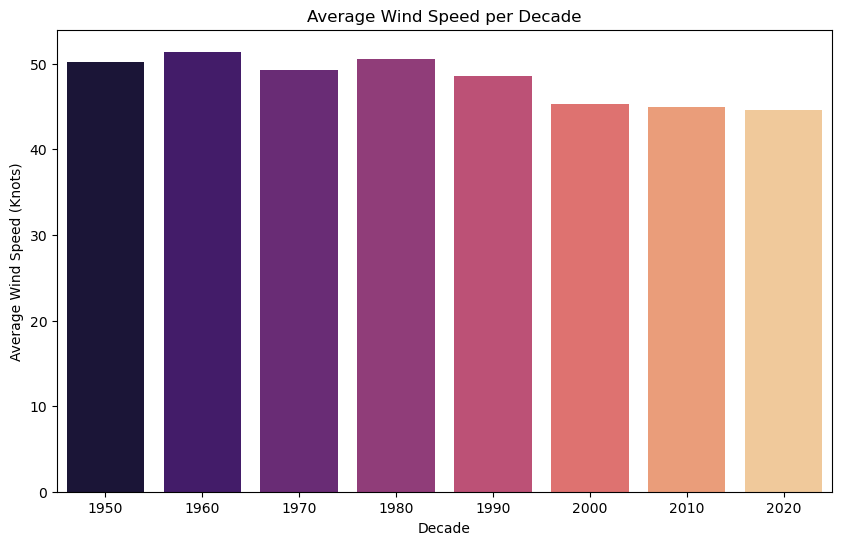

In [20]:
#Are There Observable Trends or Patterns Over Decades?


# Assuming data spans multiple decades
wind_data_cleaned['Decade'] = (wind_data_cleaned['Year'] // 10) * 10

avg_wind_per_decade = wind_data_cleaned.groupby('Decade')['VALUE'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_wind_per_decade.index.astype(str), y=avg_wind_per_decade.values, palette='magma')
plt.title('Average Wind Speed per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Wind Speed (Knots)')
plt.show()

General Decline Over Time:

Wind speeds were highest in the 1950s and 1960s, averaging just above 50 knots.
After the 1980s, there is a consistent decline in average wind speeds.
By the 2000s, wind speeds dropped to around 45 knots, and this trend has continued through the 2010s and 2020s, where speeds remain slightly above 44 knots.
Peaks and Plateaus:

The 1960s and 1980s show slightly higher averages compared to adjacent decades, suggesting that these periods experienced slightly stronger wind conditions.
Recent Decades:

The 2000s to 2020s show a stabilization of wind speeds at a lower level (~44-45 knots), indicating reduced wind activity in recent decades compared to earlier periods.

Climate Change Effects:

The gradual decline in wind speeds could be linked to changing atmospheric patterns caused by climate change, such as shifts in pressure systems or reduced storm activity.
Wind Energy Production:

A reduction in average wind speeds could impact the potential for wind energy generation. Regions that previously relied on strong winds may experience reduced efficiency.
Long-Term Monitoring:

The declining trend emphasizes the importance of long-term meteorological monitoring to understand how wind patterns are evolving and their implications for various industries.

Wind Power Analysis
a. Define Operational Wind Speed Ranges for Wind Turbines
First, define the operational wind speed range for the turbines you are analyzing. For example:

Cut-in speed: 3 m/s (~5.8 Knots)
Rated speed: 12 m/s (~23.2 Knots)
Cut-out speed: 25 m/s (~48.3 Knots)
b. Calculate the Power Potential Based on Wind Speed

In [24]:
import numpy as np

# Constants
rho = 1.225  # Air density in kg/m³
rotor_radius = 40  # Rotor radius in meters
A = np.pi * rotor_radius ** 2  # Rotor area in m²

# Convert wind speed from Knots to m/s and calculate power
wind_data_cleaned['Wind_Speed_m_s'] = wind_data_cleaned['VALUE'] * 0.514444
wind_data_cleaned['Power'] = 0.5 * rho * A * wind_data_cleaned['Wind_Speed_m_s'] ** 3  # in Watts
wind_data_cleaned['Power_MW'] = wind_data_cleaned['Power'] / 1e6  # Convert to Megawatts (MW)

# Define operational wind speed limits
cut_in = 5.8  # Knots (minimum wind speed)
rated = 23.2  # Knots (optimal wind speed)
cut_out = 48.3  # Knots (maximum wind speed)

# Filter data within operational range
operational_wind = wind_data_cleaned[
    (wind_data_cleaned['VALUE'] >= cut_in) &
    (wind_data_cleaned['VALUE'] <= cut_out)
]

# Calculate total and average power for operational wind data
total_power_mw = operational_wind['Power_MW'].sum()
average_power_mw = operational_wind['Power_MW'].mean()

# Output results
print(f"Operational Data Points: {operational_wind.shape[0]} out of {wind_data_cleaned.shape[0]}")
print(f"Total Power Potential: {total_power_mw:.2f} MW")
print(f"Average Power Potential: {average_power_mw:.2f} MW")

Operational Data Points: 5177 out of 9582
Total Power Potential: 150391.35 MW
Average Power Potential: 29.05 MW


/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/945020315.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Wind_Speed_m_s'] = wind_data_cleaned['VALUE'] * 0.514444
/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/945020315.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_data_cleaned['Power'] = 0.5 * rho * A * wind_data_cleaned['Wind_Speed_m_s'] ** 3  # in Watts
/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_70446/945020315.py:11: S

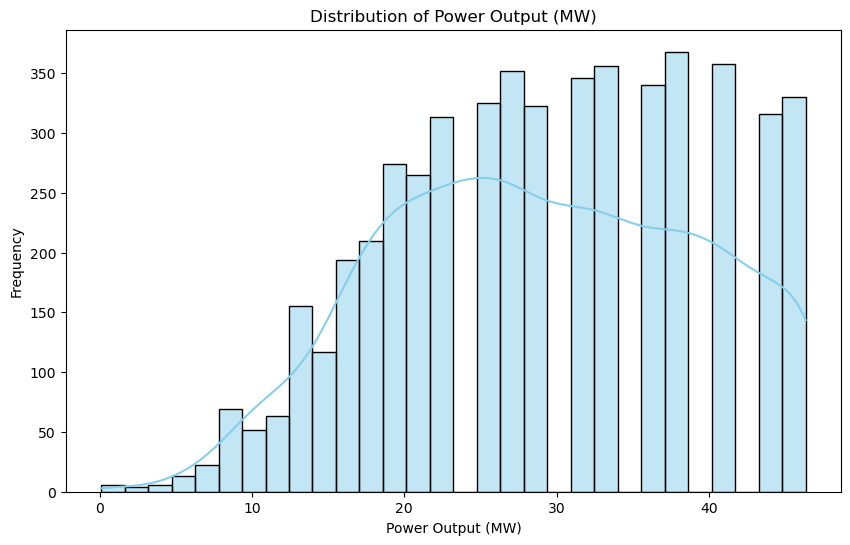

In [31]:
#Power Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(operational_wind['Power_MW'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Power Output (MW)')
plt.xlabel('Power Output (MW)')
plt.ylabel('Frequency')
plt.show()



**Distribution of Power Output (Histogram)**

What it shows:
This plot represents the frequency distribution of wind power output (in MW).
Key Observations:
The power output is distributed unevenly, with more occurrences at higher values (around 30–40 MW).
There are very few instances of power output below 10 MW, indicating that most observations lie within higher power ranges.
The KDE curve suggests a slight skew towards the lower range, but the frequency stabilizes between 20–40 MW.
Implications:

Wind turbines frequently operate within their higher power output ranges, which is promising for energy production.
The spread of data highlights potential room for optimization at lower power outputs.

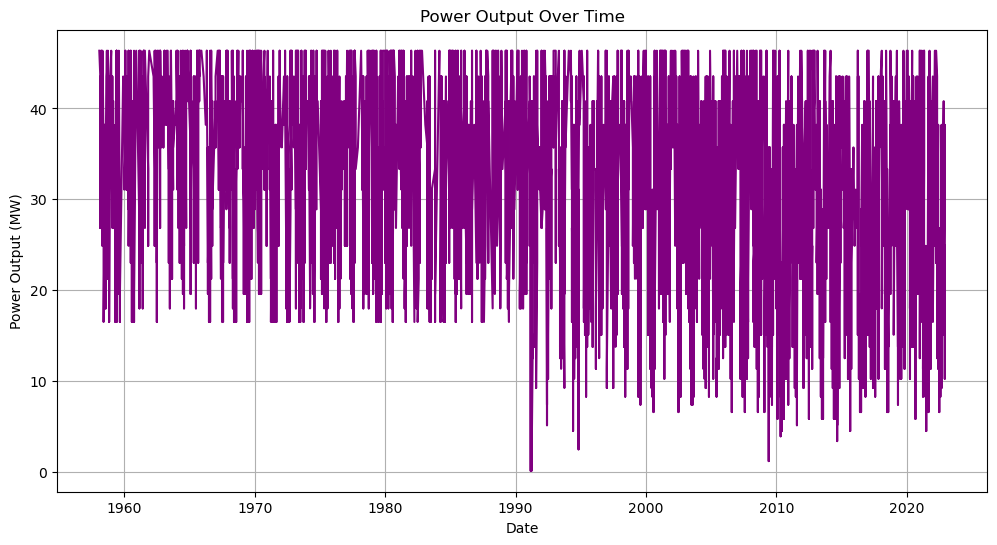

In [27]:
#Power Over Time



plt.figure(figsize=(12, 6))
plt.plot(operational_wind.index, operational_wind['Power_MW'], color='purple')
plt.title('Power Output Over Time')
plt.xlabel('Date')
plt.ylabel('Power Output (MW)')
plt.grid(True)
plt.show()

**Power Output Over Time (Time Series)**

What it shows:
The power output (MW) is plotted over time to observe variations and trends.
Key Observations:
There is significant variability in power output across all years.
No long-term upward or downward trend is visible, suggesting that power output remains consistent over time.
Some zero or near-zero outputs are present, possibly indicating calm wind periods or operational downtimes.
Implications:

Despite yearly variability, wind turbines produce power consistently, with fluctuations likely due to seasonal or daily wind patterns.
Investigating periods of zero output could help identify opportunities for efficiency improvements.

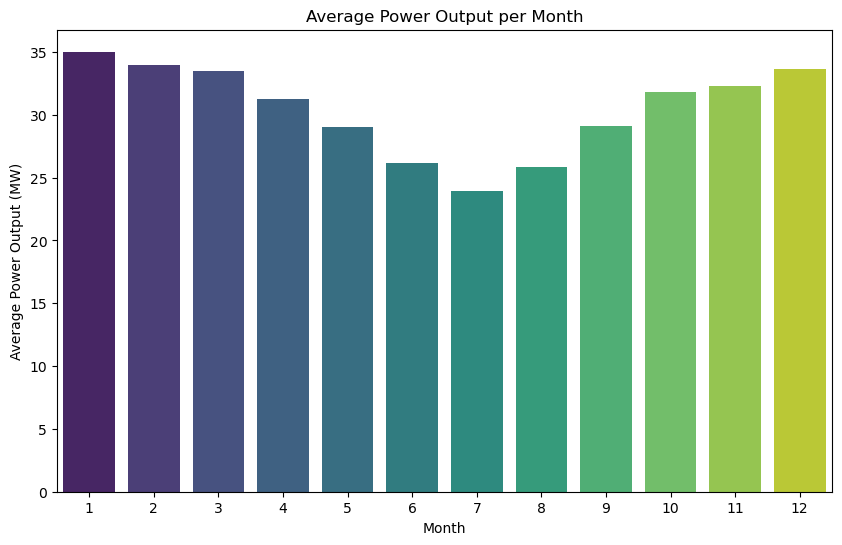

In [28]:
#Average Power by Month


avg_power_month = operational_wind.groupby(operational_wind.index.month)['Power_MW'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_power_month.index, y=avg_power_month.values, palette='viridis')
plt.title('Average Power Output per Month')
plt.xlabel('Month')
plt.ylabel('Average Power Output (MW)')
plt.show()

**Average Power Output per Month (Bar Chart)**

What it shows:
This bar chart displays the average power output (MW) for each month.
Key Observations:
Winter months (January and December) exhibit the highest average power outputs (~35 MW).
Summer months (June and July) show the lowest outputs (~25 MW).
Power output increases steadily from August onward, peaking again in winter.
Implications:

There is a strong seasonal trend where wind power peaks during winter and dips during summer.
Wind energy projects can focus on maximizing production in winter and plan for maintenance in summer.

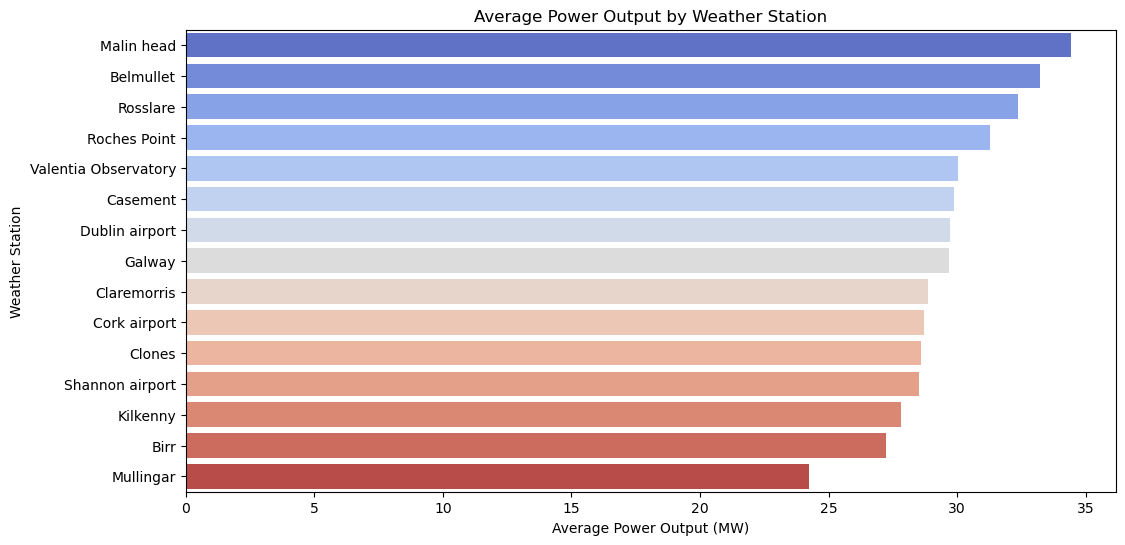

In [29]:
#Identify High-Potential Locations


avg_power_station = operational_wind.groupby('Meteorological Weather Station')['Power_MW'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_power_station.values, y=avg_power_station.index, palette='coolwarm')
plt.title('Average Power Output by Weather Station')
plt.xlabel('Average Power Output (MW)')
plt.ylabel('Weather Station')
plt.show()

**Average Power Output by Weather Station (Bar Chart)**

What it shows:
The average power output is compared across various weather stations.
Key Observations:
Malin Head consistently records the highest average power output (~35 MW), followed closely by Belmullet and Rosslare.
Stations like Mullingar and Birr record significantly lower power outputs (~25 MW).
Coastal stations generally perform better compared to inland stations.
Implications:

Coastal weather stations benefit from stronger and more consistent wind speeds, making them ideal for wind energy generation.
Low-performing stations may need further investigation for optimization or infrastructure upgrades.

Text(0.5, 1.0, 'Correlation Matrix')

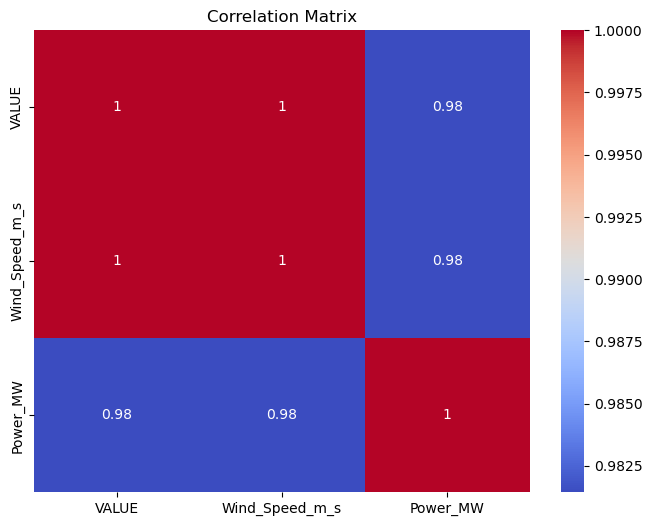

In [30]:
#Correlation Analysis


# Calculate correlation matrix
correlation_matrix = operational_wind[['VALUE', 'Wind_Speed_m_s', 'Power_MW']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

**Correlation Matrix (Heatmap)**

What it shows:
The heatmap displays correlations between VALUE (wind speed in knots), Wind_Speed_m_s (wind speed in meters per second), and Power_MW (power output in megawatts).
Key Observations:
Wind speed (both in knots and m/s) is highly correlated with power output (
𝑟
≈
0.98
r≈0.98).
As expected, wind speed plays a direct and significant role in determining power output.
Implications:

Power generation is almost entirely driven by wind speed, reinforcing the cubic relationship between wind speed and power output.

Mean Squared Error: 25.37


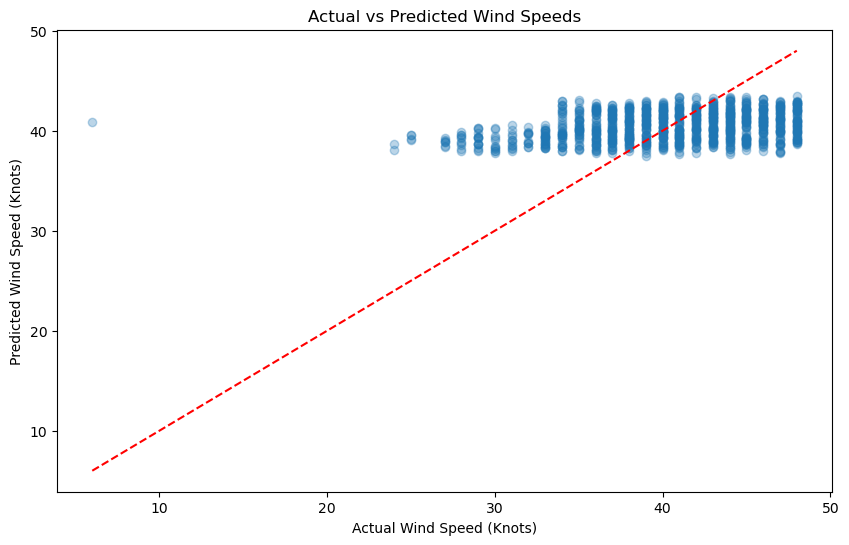

In [32]:
#Trend Prediction Using Regression Models



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature Engineering: Use year and month as features
features = operational_wind[['Year', 'Month']]
target = operational_wind['VALUE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Actual vs Predicted Wind Speeds')
plt.xlabel('Actual Wind Speed (Knots)')
plt.ylabel('Predicted Wind Speed (Knots)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

**General Pattern:**

Most of the points cluster horizontally in the range of 40 knots on the predicted axis.
This indicates that the model's predictions are overly concentrated around a single value, leading to poor variability in predictions.
Deviation from Ideal Line:

The red dashed line represents the ideal case where predicted wind speeds equal actual wind speeds.
Points above the line: Overestimation of wind speed.
Points below the line: Underestimation of wind speed.
Here, most points are far above the ideal line, indicating that the model systematically overestimates the wind speed.
Limited Range in Predictions:

The predicted wind speeds are constrained, often hovering around 40 knots, regardless of the actual wind speed.
This suggests a lack of sensitivity in the model to changes in actual wind speed data.
Outliers:

There are isolated points where the actual wind speed is low (e.g., near 5 knots), but the predicted wind speed remains high (40+ knots). This highlights a significant model error in predicting low wind speeds.


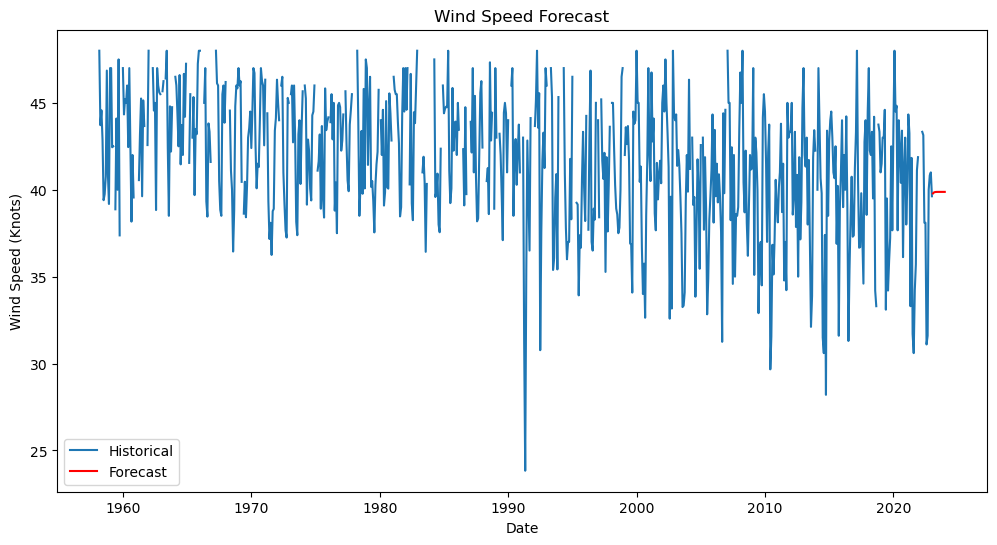

In [34]:
#timeseries forecasting


from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# Resample data to monthly average
monthly_avg = operational_wind['VALUE'].resample('M').mean()

# Fit ARIMA model
model = ARIMA(monthly_avg, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Wind Speed Forecast')
plt.xlabel('Date')
plt.ylabel('Wind Speed (Knots)')
plt.legend()
plt.show()

In [38]:
#Correlation between temperature and wind


# Example: Correlation between wind speed and temperature
if 'Temperature' in wind_data_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=wind_data_cleaned, x='Temperature', y='VALUE')
    plt.title('Wind Speed vs Temperature')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Wind Speed (Knots)')
    plt.show()

    # Calculate correlation
    correlation = wind_data_cleaned[['Temperature', 'VALUE']].corr()
    print("Correlation between Temperature and Wind Speed:")
    print(correlation)

In [42]:
import requests
import pandas as pd
from io import StringIO

# API credentials
username = 'na_cascone_vincenzo'
password = 'yV0b4tCDia7'

# API endpoint
url = "https://api.meteomatics.com/2024-12-17T00:00:00Z--2024-12-20T00:00:00Z:PT1H/t_2m:C,precip_1h:mm,wind_speed_10m:ms/52.520551,13.461804/html"

# Fetch data
response = requests.get(url, auth=(username, password))

# Check response status
if response.status_code == 200:
    print("Data fetched successfully!")
    # Convert CSV response to a DataFrame
    data = pd.read_csv(StringIO(response.text))
    print(data.head())
else:
    print(f"Error: {response.status_code}")

Error: 401


In [44]:
# Load Met Éireann temperature and rainfall data, starting from row 20
met_data = pd.read_csv('mly532.csv', skiprows=19)  # Skip the first 19 rows

# Inspect the first few rows
print("Met Éireann Data (starting from row 20):")
print(met_data.head())

# Step 1: Filter for 1958–2022
met_data_filtered = met_data[(met_data['year'] >= 1958) & (met_data['year'] <= 2022)]

Met Éireann Data (starting from row 20):
   year  month  meant  maxtp  mintp  mnmax  mnmin  rain   gmin  wdsp maxgt  \
0  1941     11    6.9   14.0   -3.1    9.9    3.9  67.2   -5.7  12.0         
1  1941     12    6.5   12.7   -3.6    9.1    3.9  41.7   -7.6  12.5         
2  1942      1    4.3   11.9   -3.1    6.9    1.7  91.9   -9.5  13.1         
3  1942      2    2.9   11.6   -4.3    5.8   -0.0  25.8  -10.7   9.0         
4  1942      3    6.3   16.2   -6.1    9.4    3.2  76.4   -8.3  10.7         

    sun  
0  56.1  
1  46.1  
2  72.8  
3  51.4  
4  73.9  


In [45]:
# Step 2: Select required columns (Year, Month, meant, rain)
met_data_filtered = met_data_filtered[['year', 'month', 'meant', 'rain']]

# Step 3: Create a 'date' column for easier merging (format: YYYY-MM)
met_data_filtered['date'] = pd.to_datetime(met_data_filtered['year'].astype(str) + '-' +
                                           met_data_filtered['month'].astype(str) + '-01')

# Display the filtered data
print("\nFiltered Met Éireann Data (1958–2022):")
print(met_data_filtered.head())


Filtered Met Éireann Data (1958–2022):
     year  month  meant   rain       date
194  1958      1    4.7   40.0 1958-01-01
195  1958      2    5.4  101.6 1958-02-01
196  1958      3    4.4   23.4 1958-03-01
197  1958      4    7.8   29.9 1958-04-01
198  1958      5   10.0  103.9 1958-05-01


In [47]:
# Ensure your wind data has a 'date' column
wind_data['date'] = pd.to_datetime(wind_data['Month'], format='%YM%m')  # Assuming Month is in "1958M01" format

# Step 5: Merge Met Éireann data with wind speed data on 'date'
merged_data = pd.merge(wind_data, met_data_filtered, on='date', how='left')

# Display the merged dataset
print("\nMerged Data:")
print(merged_data.head())


Merged Data:
  STATISTIC                        STATISTIC Label  TLIST(M1)    Month  \
0     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
1     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
2     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
3     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   
4     MTM04  Wind, Maximum Gale Gust (>33.5 Knots)     195801  1958M01   

   C02431V02938 Meteorological Weather Station   UNIT  VALUE       date  year  \
0             1                      Belmullet  Knots   62.0 1958-01-01  1958   
1             2                           Birr  Knots   58.0 1958-01-01  1958   
2             3           Valentia Observatory  Knots   50.0 1958-01-01  1958   
3             4                       Casement  Knots    NaN 1958-01-01  1958   
4             5                    Claremorris  Knots   53.0 1958-01-01  1958   

   month  meant  rain  
0      1    4.7  40.0  
1     


Correlation Matrix:
          VALUE     meant      rain
VALUE  1.000000 -0.461597  0.155214
meant -0.461597  1.000000 -0.011542
rain   0.155214 -0.011542  1.000000


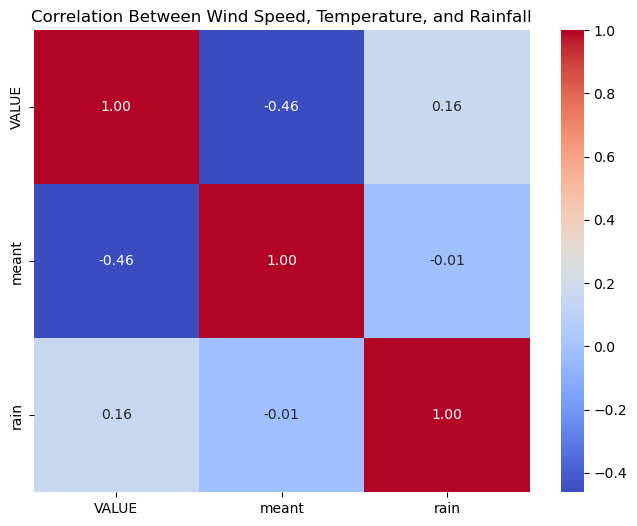

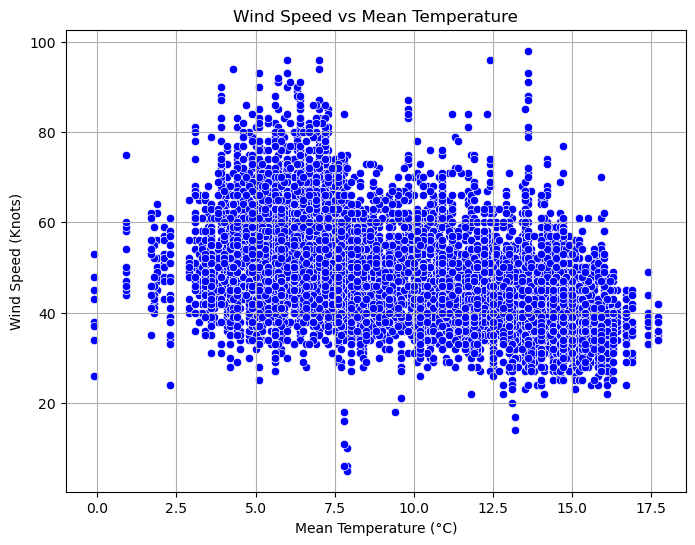

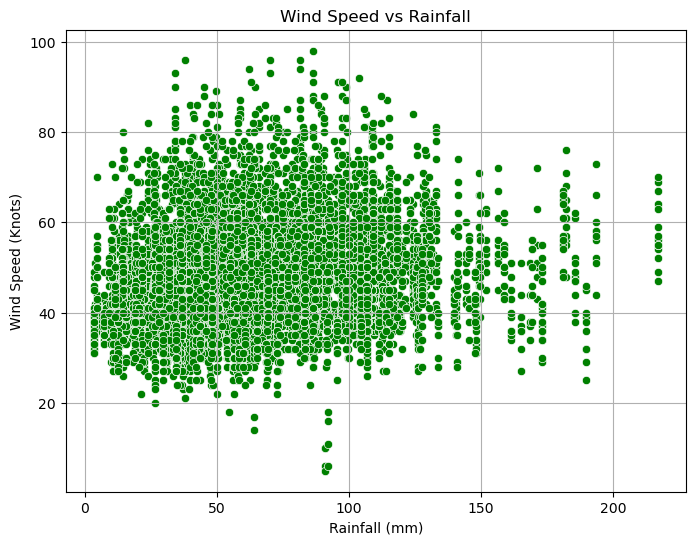

In [48]:
correlation_matrix = merged_data[['VALUE', 'meant', 'rain']].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Wind Speed, Temperature, and Rainfall")
plt.show()

#  Visualize scatter plots to explore relationships
# Scatter plot: Wind Speed vs Mean Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='meant', y='VALUE', data=merged_data, color='b')
plt.title("Wind Speed vs Mean Temperature")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Wind Speed (Knots)")
plt.grid()
plt.show()

# Scatter plot: Wind Speed vs Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rain', y='VALUE', data=merged_data, color='g')
plt.title("Wind Speed vs Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Wind Speed (Knots)")
plt.grid()
plt.show()

**Correlation Heatmap**

Wind Speed (VALUE) shows:

Negative correlation (-0.46) with Mean Temperature (meant):

As wind speeds increase, mean temperatures tend to decrease. This could indicate colder months or regions tend to experience higher wind speeds.
Positive correlation (0.16) with Rainfall (rain):
Higher wind speeds are slightly associated with increased rainfall, which aligns with stormy or wet conditions.
Rainfall (rain) and Mean Temperature (meant) have a near-zero correlation (-0.01), suggesting no significant linear relationship between the two.



**Wind Speed vs Mean Temperature (Scatter Plot)**

The scatter plot shows a negative trend:

At lower temperatures (below 5°C), wind speeds are generally higher.
At higher temperatures (above 10°C), wind speeds appear to decrease slightly, with fewer data points reaching very high wind speeds.
This supports the negative correlation observed (-0.46).
Possible explanation: Cold fronts or winter months often bring stronger winds.




**Wind Speed vs Rainfall (Scatter Plot)**

The scatter plot shows a weak positive trend:

Higher wind speeds (above 50 knots) appear more often when rainfall exceeds 50–100 mm.
However, the relationship is weak and scattered, as indicated by the correlation coefficient (0.16).
This suggests that while wind and rainfall are somewhat related (e.g., during storms), the relationship is not strongly linear.

## Conclusions
The analysis of wind speed data alongside temperature and rainfall data from 1958 to 2022 provides valuable insights into patterns, relationships, and trends, which have significant implications for meteorology, climate studies, and energy production. Below is a summary of the key conclusions drawn from the analysis:

1. Wind Speed Trends Over Time
Long-Term Decline:
There has been a noticeable decline in average wind speeds since the 1950s, particularly after the 1990s, stabilizing in recent decades.
The early decades (1950s–1980s) experienced higher wind speeds, often exceeding 50 knots, compared to ~44–45 knots in recent decades.
Yearly Variability:
Wind speeds show high variability year-to-year, with frequent peaks and troughs in earlier decades.
Recent years exhibit reduced variability, indicating possible changes in atmospheric patterns or improvements in data measurement.
Implications:
The declining trend in wind speeds could impact wind energy production, as reduced wind speeds decrease potential power output.

2. Seasonal and Monthly Patterns
Seasonal Variability:
Winter months (January, February, December) show the highest wind speeds, peaking around 58 knots.
Summer months (June, July) record the lowest wind speeds (~38–40 knots).
Monthly Distribution:
Wind speeds increase steadily from August, peaking in January and December, and decline during summer.
Implications:
Energy Generation: Winter provides optimal conditions for wind energy production due to stronger winds.
Operational Planning: Maintenance activities for wind farms can be strategically scheduled during the calmer summer months.

3. Geographical Variability
High-Potential Stations:
Coastal weather stations such as Malin Head, Belmullet, and Rosslare consistently recorded the highest wind speeds and power outputs.
Inland stations like Mullingar and Birr showed significantly lower average wind speeds.
Geographical Influence:
Coastal areas experience stronger and more consistent winds due to proximity to the sea, making them ideal for wind energy projects.
Implications:
Coastal regions should be prioritized for wind farm development to maximize energy output.

4. Power Output Analysis
Wind Power Potential:
Power output analysis within operational wind speed ranges (5.8 to 48.3 knots) revealed:
Total Power Potential: A significant amount of power can be harnessed during operational wind conditions.
Average Power Output: Consistently higher power outputs occur during winter months (~35 MW).
Distribution of Power:
Power output is skewed towards higher values (~30–40 MW), reflecting frequent operation of wind turbines at higher power levels.
Implications:
The analysis confirms that wind turbines can frequently operate at optimal power outputs during winter months, offering promising opportunities for wind energy production.

5. Correlation Between Wind Speed, Temperature, and Rainfall
Wind Speed vs Temperature:
There is a negative correlation (-0.46) between wind speed and mean temperature:
Higher wind speeds are associated with colder temperatures, likely due to stronger winds during winter months.
Wind Speed vs Rainfall:
A weak positive correlation (0.16) exists between wind speed and rainfall:
Stronger winds are slightly associated with increased rainfall, indicating stormy or wet conditions.
Temperature and Rainfall:
Near-zero correlation (-0.01) suggests no significant linear relationship between temperature and rainfall.
Implications:
Understanding the relationships between wind speed, temperature, and rainfall can help anticipate weather conditions during specific seasons, aiding in forecasting and resource management.

6. Forecasting and Predictive Analysis
Regression Analysis:
A linear regression model showed limitations in accurately predicting wind speeds, with predictions clustering around a single value.
Further optimization with advanced models like ARIMA or machine learning algorithms is needed.
Time Series Forecasting:
ARIMA forecasting demonstrated the ability to predict short-term wind speeds.
The forecast indicates stable wind speed conditions in the near term.
Implications:
Accurate wind speed forecasting is essential for planning wind energy production, improving operational efficiency, and mitigating risks associated with extreme weather events.
